This notebook continued off of CitiesRecomenderPart1. Results were checked to see if they were sensible, which they were. Cities were divided up into two categories, one with cities skewing safer, and one skewing more economical, as mentioned in the last notebook. To make it easier for users to compare cities, radar charts were implemented. A user could compare his or her own city with the best city (that is not filled up with relocators) in the AI, and see if it is worth getting a recommendation for two cities. If the user decides to get a recommendation, two cities from both categories are also shown on a radar chart. To make the comparison more trustworthy, a disclaimer is added on the radar charts indicating potential ways they could be misleading. 

Simulations of people using the AI were ran. One had every person willing to relocate to any city shown, while the other showed people choosing to relocate if the recommended cities were significantly better than the one they already lived in.

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
from faker import Faker
import plotly.io as pio
fake = Faker()

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 25)

Here is the final result from CitiesRecomenderPart1:

In [2]:
dfAllCities = pd.read_csv('CitiesFinal.csv')
dfAllCities.head(10)

Name State  EconomyRanking     Economy  SafetyRanking  \
0              Erie    CO            18.0  861.590158           17.0   
1           Lincoln    ND            22.0  854.831714           20.0   
2            Becker    MN            28.0  838.191895           74.0   
3          Smithton    IL            43.0  809.397396           80.0   
4           Brandon    SD            47.0  804.695568           81.0   
5        Los Alamos    NM             4.0  951.816023          152.0   
6       Williamston    MI           116.0  750.778524          107.0   
7        Plain City    OH            69.0  785.355486          143.0   
8         Hampshire    IL             3.0  954.655421          167.0   
9  Whispering Pines    NC           104.0  755.704608          136.0   

       Safety   Magnitude  Income  CostOfLiving  StateCOL  Crime  Population  \
0  218.279070   24.758837  103820    120.498127     105.8     86       18772   
1  174.444444   29.732137   94292    110.304752      97.8     18        3140   
2   73.116667   79.120162   92653    110.539127      99.6     60        4387   
3   71.000000   90.824006   80625     99.611143      90.5     50        3550   
4   70.593220   93.648278   84058    104.459380      96.2    118        8330   
5   48.441799  152.052622  109341    114.876192      90.6    378       18311   
6   59.078125  157.813181   73125     97.398897      91.4     64        3781   
7   50.416667  158.776573   78798    100.334182      92.9     72        3630   
8   45.500000  167.026944  110071    115.299193      90.5    132        6006   
9   51.904762  171.207476   76860    101.706406      96.4     42        2180   

   RelocationNumber COLIsEstimated  
0              29.0              T  
1               5.0              T  
2               7.0              T  
3               6.0              T  
4              13.0              T  
5              29.0              T  
6               6.0              T  
7               6.0              T  
8               9.0              T  
9               3.0              T

So are these results sensible? Erie CO is the top ranked city in the result and has an estimated COL. Bastrop LA is the bottom ranked city in the result and also has an estimated COL.

A Google image search of Erie CO returns these pictures as the first results:
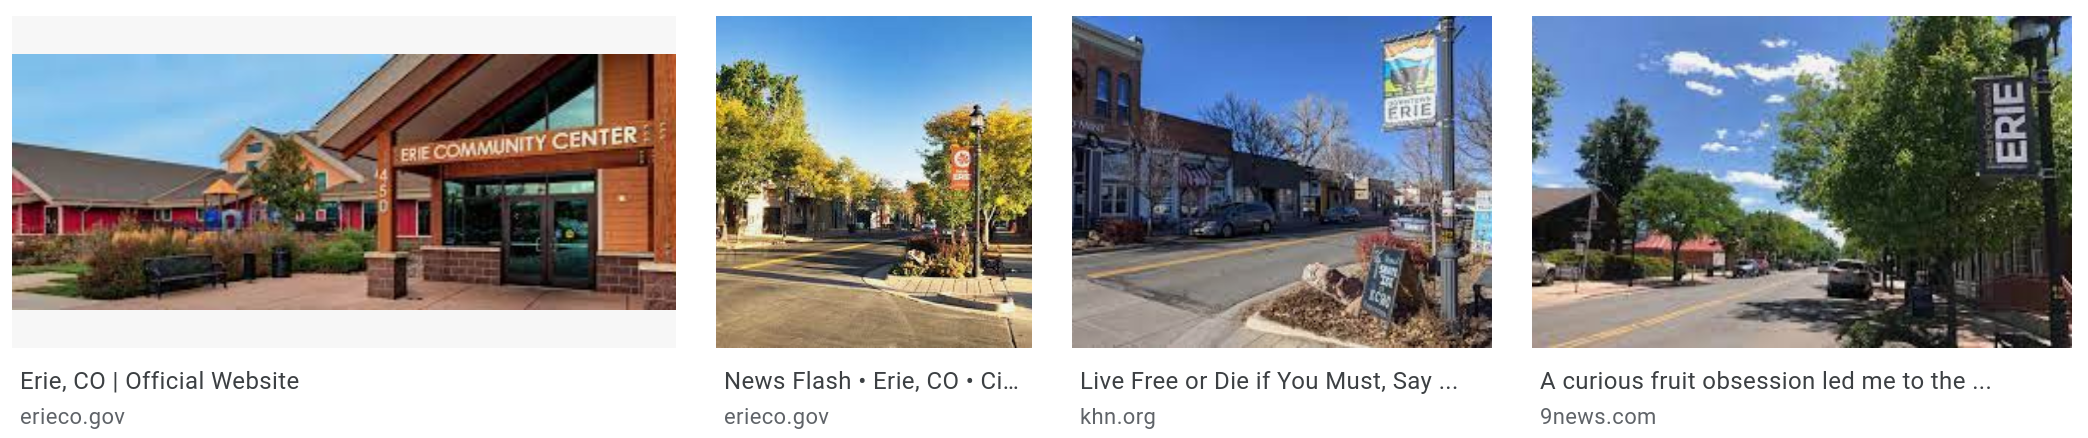

A Google image search of Bastrop LA returns these pictures as the first results:
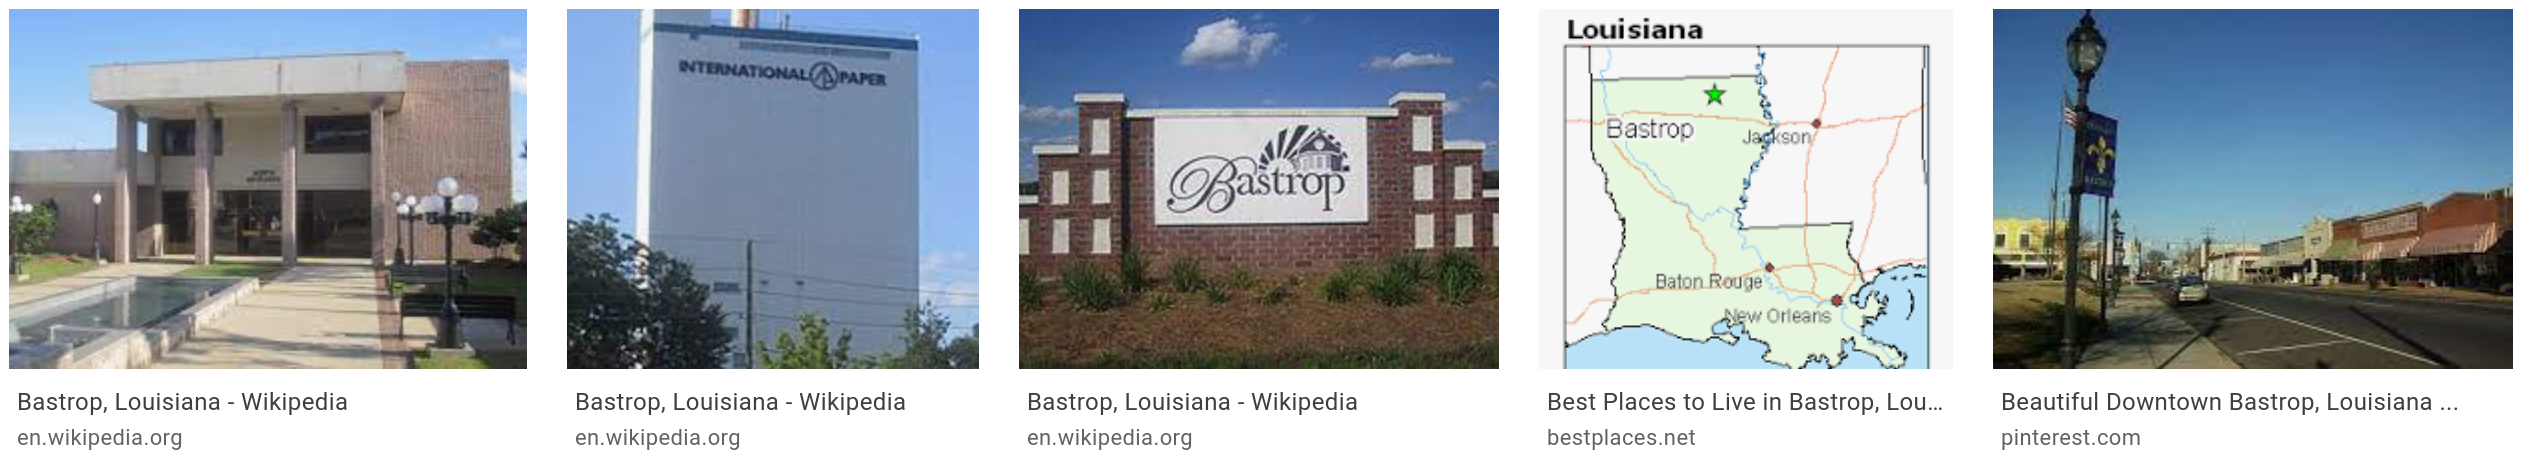

Comparing the two image search results, you get the impression that Erie is a nicer city than Bastrop.

Some quick research on Bastrop showed that Bastrop's economy has been severely affected by a paper mill closing.
https://www.knoe.com/content/news/December-marks-the-10th-year-since-International-Paper-closed-its-doors-in-Bastrop--503299671.html


I used to live in Virginia Beach VA and also used to live in Columbia SC. In my personal experience, have felt that Virginia Beach was just about as safe as Columbia, but had much more job opportunities, higher incomes on average, and a cost of living about the same as Columbia's. Personally I think Virginia Beach is a better city, but what does the AI think? Me and the AI came to the same conclusion.

In [3]:
x = dfAllCities.loc[(dfAllCities['Name'] == "Virginia Beach") & (dfAllCities['State'] == "VA")]
y = dfAllCities.loc[(dfAllCities['Name'] == "Columbia") & (dfAllCities['State'] == "SC")]

if (y['Magnitude'].values[0] > dfAllCities['Magnitude'].mean()):
    print(y['Name'].values[0] + " has an estimated safety and economy below average compared to all cities.")
else:
    print(y['Name'].values[0] + " has an estimated safety and economy above average compared to all cities.")
    
if (x['Magnitude'].values[0] > dfAllCities['Magnitude'].mean()):
    print(x['Name'].values[0] + " has an estimated safety and economy below average compared to all cities.")
else:
    print(x['Name'].values[0] + " has an estimated safety and economy above average compared to all cities.")

Columbia has an estimated safety and economy below average compared to all cities.
Virginia Beach has an estimated safety and economy above average compared to all cities.


Here are cities that can possibly be recommended as they have a non-predicted COL.

In [4]:
dfCitiesAccurateCOL = dfAllCities.loc[(dfAllCities['COLIsEstimated'] == 'F')].copy(deep=True)
dfCitiesAccurateCOL.head(10)

Name State  EconomyRanking     Economy  SafetyRanking     Safety  \
57       Truckee    CA           194.0  704.066265          281.0  35.162047   
111     Stamford    CT            80.0  775.981544          487.0  26.437204   
124      Midland    MI           115.0  751.310345          519.0  25.665394   
186        Logan    UT           595.0  592.153361          235.0  38.259404   
187        Minot    ND           140.0  736.317530          626.0  23.256030   
198    Jefferson    GA           260.0  677.977413          606.0  23.723343   
247    Rochester    MN           122.0  748.828366          761.0  20.739929   
249       Daphne    AL           133.0  739.896480          766.0  20.679752   
272        Provo    UT           153.0  729.821606          805.0  20.012579   
273  Glens Falls    NY           677.0  579.320487          462.0  27.191235   

      Magnitude  Income  CostOfLiving  StateCOL  Crime  Population  \
57   341.463029   93500         132.8     146.9    469       16491   
111  493.527102   92497         119.2     119.5   4650      122933   
124  531.588186   65364          87.0      91.4   1572       40346   
186  639.726504   56373          95.2     101.5   1276       48819   
187  641.463951   66784          90.7      97.8   1617       37605   
198  659.420958   66035          97.4      89.8    347        8232   
247  770.717198   72861          97.3      99.6   5064      105027   
249  777.460610   71474          96.6      88.6    968       20018   
272  819.410764   73639         100.9     101.5   5883      117734   
273  819.617594   57121          98.6     143.7    502       13650   

     RelocationNumber COLIsEstimated  
57               26.0              F  
111             192.0              F  
124              63.0              F  
186              76.0              F  
187              59.0              F  
198              13.0              F  
247             164.0              F  
249              31.0              F  
272             184.0              F  
273              21.0              F

Scatterplot of all cities from the final result in CitiesRecomenderPart1:

In [5]:
fig = px.scatter(dfAllCities, x='EconomyRanking', y='SafetyRanking', text="Name", width=980, height=980)
fig.update_layout(
    font=dict(size=10),
       margin=dict(l=2, r=2, t=2, b=2),
)


fig.show()

Scatterplot of cities that can possibly be recommended:

In [6]:
fig = px.scatter(dfCitiesAccurateCOL, x='EconomyRanking', y='SafetyRanking', text="Name", width=980, height=980)
fig.update_layout(
    font=dict(size=10),
       margin=dict(l=2, r=2, t=2, b=2),
)


fig.show()

From the scatterplot above, it shows that rankings in Safety and Economy of cities with accurate COLs were dependent on cities with predicted COLs. The cities available for recommendation must be re-ranked and have their magnitudes re-calculated without the influence of cities that cannot be recommended. As you can see, the best city changed from Truckee to Stamford.

In [7]:
dfCitiesAccurateCOL['EconomyRanking'] = dfCitiesAccurateCOL['Economy'].rank(ascending=False)
dfCitiesAccurateCOL['SafetyRanking'] = dfCitiesAccurateCOL['Safety'].rank(ascending=False)
dfCitiesAccurateCOL['Magnitude'] = np.sqrt(np.power(dfCitiesAccurateCOL['EconomyRanking'] - 0, 2) + np.power(dfCitiesAccurateCOL['SafetyRanking'] - 0, 2))
dfCitiesAccurateCOL = dfCitiesAccurateCOL.sort_values(by=['Magnitude'])
dfCitiesAccurateCOL = dfCitiesAccurateCOL.reset_index()
dfCitiesAccurateCOL.head(10)

index       Name State  EconomyRanking     Economy  SafetyRanking  \
0    111   Stamford    CT             4.0  775.981544           10.0   
1    124    Midland    MI             5.0  751.310345           12.0   
2    187      Minot    ND            12.0  736.317530           15.0   
3     57    Truckee    CA            26.0  704.066265            5.0   
4    247  Rochester    MN             8.0  748.828366           26.0   
5    249     Daphne    AL            11.0  739.896480           27.0   
6    272      Provo    UT            13.0  729.821606           32.0   
7    323   San Jose    CA            18.0  718.870317           36.0   
8    198  Jefferson    GA            43.0  677.977413           14.0   
9    352   Appleton    WI            37.0  687.320838           39.0   

      Safety  Magnitude  Income  CostOfLiving  StateCOL  Crime  Population  \
0  26.437204  10.770330   92497         119.2     119.5   4650      122933   
1  25.665394  13.000000   65364          87.0      91.4   1572       40346   
2  23.256030  19.209373   66784          90.7      97.8   1617       37605   
3  35.162047  26.476405   93500         132.8     146.9    469       16491   
4  20.739929  27.202941   72861          97.3      99.6   5064      105027   
5  20.679752  29.154759   71474          96.6      88.6    968       20018   
6  20.012579  34.539832   73639         100.9     101.5   5883      117734   
7  19.109605  40.249224  124724         173.5     146.9  50773      970252   
8  23.723343  45.221676   66035          97.4      89.8    347        8232   
9  18.430278  53.758720   62340          90.7      95.5   3851       70975   

   RelocationNumber COLIsEstimated  
0             192.0              F  
1              63.0              F  
2              59.0              F  
3              26.0              F  
4             164.0              F  
5              31.0              F  
6             184.0              F  
7            1517.0              F  
8              13.0              F  
9             111.0              F

In order to better compare cities in radar charts (will be shown later), other datatypes will be ranked for dfCitiesAccurateCOL.

In [8]:
dfCitiesAccurateCOL['IncomeRanking'] = dfCitiesAccurateCOL['Income'].rank(ascending=False)
dfCitiesAccurateCOL['COLRanking'] = dfCitiesAccurateCOL['CostOfLiving'].rank(ascending=True)
dfCitiesAccurateCOL['CrimeRanking'] = dfCitiesAccurateCOL['Crime'].rank(ascending=True)
dfCitiesAccurateCOL['PopulationRanking'] = dfCitiesAccurateCOL['Population'].rank(ascending=False)
dfCitiesAccurateCOL = dfCitiesAccurateCOL.sort_values(by=['Magnitude'])
dfCitiesAccurateCOL.transpose()

0           1          2           3           4    \
index                     111         124        187          57         247   
Name                 Stamford     Midland      Minot     Truckee   Rochester   
State                      CT          MI         ND          CA          MN   
EconomyRanking            4.0         5.0       12.0        26.0         8.0   
Economy            775.981544  751.310345  736.31753  704.066265  748.828366   
...                       ...         ...        ...         ...         ...   
COLIsEstimated              F           F          F           F           F   
IncomeRanking             5.0        69.0       54.0         4.0        29.0   
COLRanking              438.0        76.5      187.5       449.0       306.5   
CrimeRanking            191.0        54.0       56.0         6.0       215.5   
PopulationRanking       112.0       290.0      303.0       418.0       132.0   

                         5           6           7           8           9    \
index                    249         272         323         198         352   
Name                  Daphne       Provo    San Jose   Jefferson    Appleton   
State                     AL          UT          CA          GA          WI   
EconomyRanking          11.0        13.0        18.0        43.0        37.0   
Economy            739.89648  729.821606  718.870317  677.977413  687.320838   
...                      ...         ...         ...         ...         ...   
COLIsEstimated             F           F           F           F           F   
IncomeRanking           33.0        26.0         1.0        60.0        86.0   
COLRanking             298.5       351.5       460.0       309.0       187.5   
CrimeRanking            21.0       241.0       428.0         2.0       173.0   
PopulationRanking      402.0       114.0        10.0       458.0       190.0   

                          10           11   ...         449        450  \
index                     342          544  ...        2664       2482   
Name                 Bismarck  Bloomington  ...   Opelousas  Greenwood   
State                      ND           IL  ...          LA         SC   
EconomyRanking           41.0         24.0  ...       459.0      400.0   
Economy            682.234157   707.651685  ...  314.692218  457.94814   
...                       ...          ...  ...         ...        ...   
COLIsEstimated              F            F  ...           F          F   
IncomeRanking            80.0         84.0  ...       460.0      412.0   
COLRanking              251.0        151.0  ...        51.5      141.0   
CrimeRanking            144.0        195.0  ...       134.0      186.0   
PopulationRanking       203.0        181.0  ...       378.0      382.0   

                          451         452        453         454         455  \
index                    2506        2612       2481        2489        2534   
Name               Pine Bluff      Laurel    Shelton   Lumberton       Macon   
State                      AR          MS         WA          NC          GA   
EconomyRanking          410.0       457.0      398.0       396.0       424.0   
Economy            447.557716  364.528522  461.20438  462.769784  437.866972   
...                       ...         ...        ...         ...         ...   
COLIsEstimated              F           F          F           F           F   
IncomeRanking           441.0       458.0      260.0       429.0       432.0   
COLRanking                6.0        45.5      416.5        12.5        83.0   
CrimeRanking            311.0       111.0       67.0       252.0       365.0   
PopulationRanking       250.0       405.0      455.0       389.0       155.0   

                          456         457         458         459         460  
index                    2687        2528        2572        2597        2654  
Name                Talladega   Brunswick      Monroe  Portsmouth     Palatka  
State         

The same ranking as above will be done to dfAllCities:

In [9]:
dfAllCities['IncomeRanking'] = dfAllCities['Income'].rank(ascending=False)
dfAllCities['COLRanking'] = dfAllCities['CostOfLiving'].rank(ascending=True)
dfAllCities['CrimeRanking'] = dfAllCities['Crime'].rank(ascending=True)
dfAllCities['PopulationRanking'] = dfAllCities['Population'].rank(ascending=False)
dfAllCities = dfAllCities.sort_values(by=['Magnitude'])
dfAllCities.transpose()

0           1           2           3           4     \
Name                     Erie     Lincoln      Becker    Smithton     Brandon   
State                      CO          ND          MN          IL          SD   
EconomyRanking           18.0        22.0        28.0        43.0        47.0   
Economy            861.590158  854.831714  838.191895  809.397396  804.695568   
SafetyRanking            17.0        20.0        74.0        80.0        81.0   
...                       ...         ...         ...         ...         ...   
COLIsEstimated              T           T           T           T           T   
IncomeRanking            22.0        37.0        44.0       119.0        92.0   
COLRanking             2618.0      2523.0      2533.0      2176.0      2354.0   
CrimeRanking            198.0        22.5       108.0        82.5       301.5   
PopulationRanking       688.0      2347.5      1969.0      2196.0      1296.0   

                         5            6           7           8     \
Name               Los Alamos  Williamston  Plain City   Hampshire   
State                      NM           MI          OH          IL   
EconomyRanking            4.0        116.0        69.0         3.0   
Economy            951.816023   750.778524  785.355486  954.655421   
SafetyRanking           152.0        107.0       143.0       167.0   
...                       ...          ...         ...         ...   
COLIsEstimated              T            T           T           T   
IncomeRanking            17.0        213.0       138.0        11.0   
COLRanking             2582.0       2047.0      2210.0      2587.0   
CrimeRanking           1077.5        119.0       151.5       369.0   
PopulationRanking       703.0       2122.0      2167.0      1621.0   

                               9             10         11    ...        2711  \
Name               Whispering Pines  Purcellville    Peotone  ...    Moultrie   
State                            NC            VA         IL  ...          GA   
EconomyRanking                104.0           1.0       30.0  ...      2622.0   
Economy                  755.704608     973.74346  825.53072  ...  303.877516   
SafetyRanking                 136.0         184.0      185.0  ...      2674.0   
...                             ...           ...        ...  ...         ...   
COLIsEstimated                    T             T          T  ...           T   
IncomeRanking                 166.0           1.0      102.0  ...      2627.0   
COLRanking                   2258.0        2707.0     2229.0  ...       561.0   
CrimeRanking                   62.5         347.0      248.0  ...      2243.0   
PopulationRanking            2640.0        1706.0     1979.5  ...       821.0   

                         2712        2713        2714        2715        2716  \
Name                  Newport     Madison     Mullins   Kingstree   Mansfield   
State                      TN          FL          SC          SC          LA   
EconomyRanking         2592.0      2673.0      2686.0      2651.0      2672.0   
Economy            313.974684  283.408854  268.711369  293.065485  283.484789   
SafetyRanking          2706.0      2643.0      2637.0      2681.0      2661.0   
...                       ...         ...         ...         ...         ...   
COLIsEstimated              T           T           T           T           T   
IncomeRanking          2604.0      2653.0      2686.0      2639.0      2672.0   
COLRanking              529.0      1723.0      1324.0      1229.0      1076.0   
CrimeRanking           2056.0      1305.5      1613.0      1433.0      1756.5   
PopulationRanking      1386.0      2400.0      1918.5      2349.0      1744.0   

                          2717        2718        2719         2720  \
Name               Red Springs     Cordele       Cairo  Belle Glade   
State                       NC          GA          IL           FL   
EconomyRanking          2628.0      2703.0      2659

In [10]:

fig = px.scatter(dfCitiesAccurateCOL, x='EconomyRanking', y='SafetyRanking', text="Name", width=980, height=980)
fig.update_layout(
    font=dict(size=10),
       margin=dict(l=2, r=2, t=2, b=2),
)


fig.show()

Now cities that cannot be recommended in a Pareto optimized fashion will be removed. Those cities removed would not be considered great cities anyway. The max value of the ranked datatypes are the maximum radius the Pareto frontier can be. Cities beyond this frontier have no chance at all of being top ranked in economy or safety.

In [11]:
print(dfCitiesAccurateCOL['EconomyRanking'].max())
print(dfCitiesAccurateCOL['SafetyRanking'].max())

461.0
461.0


In [12]:
dfGoodCitiesAccurateCOL = dfCitiesAccurateCOL.loc[(dfCitiesAccurateCOL['COLIsEstimated'] == 'F') & 
                            (dfCitiesAccurateCOL['Magnitude'] <= 461)].copy()

With the cities removed, the scatterplot takes a quarter circle shape. Also, cities can now be divided into two categories: Skews Safer and Skews More Economical.

In [13]:
fig = px.scatter(dfGoodCitiesAccurateCOL, x='EconomyRanking', y='SafetyRanking', text="Name", width=980, height=980, range_x=[-10, 500], range_y=[-10, 500])
fig.update_layout(
    font=dict(size=10),
       margin=dict(l=2, r=2, t=2, b=2),
)

fig.add_shape(type="line", x0=0, y0=0, x1=500, y1=500)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=-461, y0=-461, x1=461, y1=461,
    line_color="red",
)


fig.show()

In [14]:
dfEconomicalCities = dfGoodCitiesAccurateCOL
dfEconomicalCities = dfEconomicalCities.sort_values(by=['EconomyRanking'])
dfEconomicalCities = dfEconomicalCities.reset_index(drop=True)
dfEconomicalCities = dfEconomicalCities.loc[(dfEconomicalCities['EconomyRanking'] <= dfEconomicalCities['SafetyRanking'])
                                          ].copy()


fig = px.scatter(dfEconomicalCities, x='EconomyRanking', y='SafetyRanking', text="Name", width=980, height=980)
fig.update_layout(
    font=dict(size=10),
       margin=dict(l=2, r=2, t=2, b=2),
)
fig.add_shape(type="line", x0=0, y0=0, x1=500, y1=500)
fig.show()

In [15]:
dfEconomicalCities = dfEconomicalCities.sort_values(by=['Magnitude'])
dfEconomicalCities = dfEconomicalCities.reset_index(drop=True)
dfEconomicalCities.head()

index       Name State  EconomyRanking     Economy  SafetyRanking  \
0    111   Stamford    CT             4.0  775.981544           10.0   
1    124    Midland    MI             5.0  751.310345           12.0   
2    187      Minot    ND            12.0  736.317530           15.0   
3    247  Rochester    MN             8.0  748.828366           26.0   
4    249     Daphne    AL            11.0  739.896480           27.0   

      Safety  Magnitude  Income  CostOfLiving  StateCOL  Crime  Population  \
0  26.437204  10.770330   92497         119.2     119.5   4650      122933   
1  25.665394  13.000000   65364          87.0      91.4   1572       40346   
2  23.256030  19.209373   66784          90.7      97.8   1617       37605   
3  20.739929  27.202941   72861          97.3      99.6   5064      105027   
4  20.679752  29.154759   71474          96.6      88.6    968       20018   

   RelocationNumber COLIsEstimated  IncomeRanking  COLRanking  CrimeRanking  \
0             192.0              F            5.0       438.0         191.0   
1              63.0              F           69.0        76.5          54.0   
2              59.0              F           54.0       187.5          56.0   
3             164.0              F           29.0       306.5         215.5   
4              31.0              F           33.0       298.5          21.0   

   PopulationRanking  
0              112.0  
1              290.0  
2              303.0  
3              132.0  
4              402.0

In [16]:
dfSaferCities = dfGoodCitiesAccurateCOL
dfSaferCities = dfSaferCities.sort_values(by=['SafetyRanking'])
dfSaferCities = dfSaferCities.reset_index(drop=True)
dfSaferCities = dfSaferCities.loc[(dfSaferCities['EconomyRanking'] >= dfSaferCities['SafetyRanking'])
                                          ].copy()

fig = px.scatter(dfSaferCities, x='EconomyRanking', y='SafetyRanking', text="Name", width=980, height=980)
fig.update_layout(
    font=dict(size=10),
       margin=dict(l=2, r=2, t=2, b=2),
)
fig.add_shape(type="line", x0=0, y0=0, x1=500, y1=500)
fig.show()

In [17]:
dfSaferCities = dfSaferCities.sort_values(by=['Magnitude'])
dfSaferCities = dfSaferCities.reset_index(drop=True)
dfSaferCities.head()

index       Name State  EconomyRanking     Economy  SafetyRanking  \
0     57    Truckee    CA            26.0  704.066265            5.0   
1    198  Jefferson    GA            43.0  677.977413           14.0   
2    342   Bismarck    ND            41.0  682.234157           38.0   
3    433  Ann Arbor    MI            57.0  659.526687           47.0   
4    457  Green Bay    WI            64.0  649.923414           51.0   

      Safety  Magnitude  Income  CostOfLiving  StateCOL  Crime  Population  \
0  35.162047  26.476405   93500         132.8     146.9    469       16491   
1  23.723343  45.221676   66035          97.4      89.8    347        8232   
2  18.782430  55.901699   63516          93.1      97.8   3415       64142   
3  17.287283  73.878278   65491          99.3      91.4   6464      111745   
4  17.068733  81.835200   59403          91.4      95.5   5936      101320   

   RelocationNumber COLIsEstimated  IncomeRanking  COLRanking  CrimeRanking  \
0              26.0              F            4.0       449.0           6.0   
1              13.0              F           60.0       309.0           2.0   
2             100.0              F           80.0       251.0         144.0   
3             175.0              F           66.5       331.5         261.0   
4             158.0              F          113.0       219.5         246.0   

   PopulationRanking  
0              418.0  
1              458.0  
2              203.0  
3              125.0  
4              140.0

There is an unfortunate case, where Utica NY has the same Economy and Safety Ranking and is in both categories of cities as a result. 

In [18]:
dfGoodCitiesAccurateCOL.loc[(dfGoodCitiesAccurateCOL['Name'] == "Utica")]

index   Name State  EconomyRanking     Economy  SafetyRanking    Safety  \
250   1669  Utica    NY           267.0  533.560043          267.0  9.106597   

      Magnitude  Income  CostOfLiving  StateCOL  Crime  Population  \
250  377.595021   50208          94.1     143.7   6276       57153   

     RelocationNumber COLIsEstimated  IncomeRanking  COLRanking  CrimeRanking  \
250              89.0              F          270.5       268.5         256.0   

     PopulationRanking  
250              227.5

What category Utica best suits can still be determined. Taking the values in safety and economy that Utica has and seeing how they differ from the the average, will determine what category Utica is best suited for. Utica's economy value is closer to the average than Utica's safety. Note that Utica's safety and economy are both below average.

In [19]:
print(dfGoodCitiesAccurateCOL['Safety'].mean())
print(dfGoodCitiesAccurateCOL['Economy'].mean())
print(dfGoodCitiesAccurateCOL['Safety'].mean() / 9.106597)
print(dfGoodCitiesAccurateCOL['Economy'].mean() / 533.560043)

12.660335477663253
581.2390235937992
1.3902378108598912
1.0893601033647853


Utica will be removed from dfSaferCities:

In [20]:
dfSaferCities = dfSaferCities.loc[(dfSaferCities['Name'] != "Utica")].copy()

Now, cities can be recommended. Let's say the first person to want a recommendation asks for one. The person comes from Bastrop Louisiana which is the worst ranked city in dfAllCities in the category of magnitude. Stamford, which is the best ranked city in dfCitiesAccurateCOL is shown as a possible recommendation. The ranking stats for Bastrop and Stamford are put in a radar chart, where smaller values on the chart are better with the exception of population. Higher populations are shown as "better", but not everyone wants to live in a populated city. To make the radar chart more easy to read visually, r values start at the maximum in the center.

The radar chart shows that Stamford is far safer than Bastrop, but Bastrop has a better Cost Of Living. The person would probably consider relocating from Bastrop. 

In [21]:
x = dfAllCities.loc[(dfAllCities['Name'] == "Stamford") & (dfAllCities['State'] == "CT")]
y = dfAllCities.loc[(dfAllCities['Name'] == "Bastrop") & (dfAllCities['State'] == "LA")]
categories = ['Economy Ranking','Income Ranking', 'Low Cost of Living Ranking','Safety Ranking','High Population Ranking', 'Low Numbers of Crime Ranking']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = [x['EconomyRanking'].values[0],x['IncomeRanking'].values[0],x['COLRanking'].values[0],x['SafetyRanking'].values[0],x['PopulationRanking'].values[0],x['CrimeRanking'].values[0]],
      theta=categories,
      name='Stamford'
))
fig.add_trace(go.Scatterpolar(
      r = [y['EconomyRanking'].values[0],y['IncomeRanking'].values[0],y['COLRanking'].values[0],y['SafetyRanking'].values[0],y['PopulationRanking'].values[0],y['CrimeRanking'].values[0]],
      theta=categories,
      name='Bastrop'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[3000, 0]
    )),
  showlegend=True
)

fig.show()



if (y['Magnitude'].values[0] > dfAllCities['Magnitude'].mean()):
    print(y['Name'].values[0] + " has an estimated safety and economy below average compared to all cities.")
else:
    print(y['Name'].values[0] + " has an estimated safety and economy above average compared to all cities.")
    
print("\n" + "Disclaimer: Cities are ranked from a pool of 2723 cities. The cost of living for most cities are estimated." + "\n"
      + "The Economy and Low Cost of Living Rankings can be misleading if two cities have Rankings very close to each other.")
print("Crime Ranking and High Population Ranking are determined from an FBI dataset from 2010.")

Bastrop has an estimated safety and economy below average compared to all cities.

Disclaimer: Cities are ranked from a pool of 2723 cities. The cost of living for most cities are estimated.
The Economy and Low Cost of Living Rankings can be misleading if two cities have Rankings very close to each other.
Crime Ranking and High Population Ranking are determined from an FBI dataset from 2010.


What if that person came from Napa CA instead of Bastrop? Overall, Stamford is marginally better than Napa. The person probably will think that it is not worth relocating to Stamford.

In [22]:
x = dfAllCities.loc[(dfAllCities['Name'] == "Stamford") & (dfAllCities['State'] == "CT")]
y = dfAllCities.loc[(dfAllCities['Name'] == "Napa") & (dfAllCities['State'] == "CA")]
categories = ['Economy Ranking','Income Ranking', 'Low Cost of Living Ranking','Safety Ranking','High Population Ranking', 'Low Numbers of Crime Ranking']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = [x['EconomyRanking'].values[0],x['IncomeRanking'].values[0],x['COLRanking'].values[0],x['SafetyRanking'].values[0],x['PopulationRanking'].values[0],x['CrimeRanking'].values[0]],
      theta=categories,
      name='Stamford'
))
fig.add_trace(go.Scatterpolar(
      r = [y['EconomyRanking'].values[0],y['IncomeRanking'].values[0],y['COLRanking'].values[0],y['SafetyRanking'].values[0],y['PopulationRanking'].values[0],y['CrimeRanking'].values[0]],
      theta=categories,
      name='Napa'
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[3000, 0]
    )),
  showlegend=True
)

fig.show()



if (y['Magnitude'].values[0] > dfAllCities['Magnitude'].mean()):
    print(y['Name'].values[0] + " has an estimated safety and economy below average compared to all cities.")
else:
    print(y['Name'].values[0] + " has an estimated safety and economy above average compared to all cities.")
    
print("\n" + "Disclaimer: Cities are ranked from a pool of 2723 cities. The cost of living for most cities are estimated." + "\n"
      + "The Economy and Low Cost of Living Rankings can be misleading if two cities have Rankings very close to each other.")
print("Crime Ranking and High Population Ranking are determined from an FBI dataset from 2010.")

Napa has an estimated safety and economy above average compared to all cities.

Disclaimer: Cities are ranked from a pool of 2723 cities. The cost of living for most cities are estimated.
The Economy and Low Cost of Living Rankings can be misleading if two cities have Rankings very close to each other.
Crime Ranking and High Population Ranking are determined from an FBI dataset from 2010.


Suppose a person is serious about relocating after comparing his or her own city with the top city available. This person will be shown two cities: one that skews more to safety and one that skews more to economy. In this case it is Truckee and Stamford respectively. If the cities for recommendation were not split into categories, and were instead recommended in the order of lowest magnitudes, the two recommendations would be Stamford and Midland. Midland has a SafetyRanking of 12, while Truckee has a SafetyRanking of 5. Truckee is a safer city than Midland.

In [23]:
x = dfGoodCitiesAccurateCOL.loc[(dfGoodCitiesAccurateCOL['Name'] == "Stamford") & (dfGoodCitiesAccurateCOL['State'] == "CT")]
y = dfGoodCitiesAccurateCOL.loc[(dfGoodCitiesAccurateCOL['Name'] == "Truckee") & (dfGoodCitiesAccurateCOL['State'] == "CA")]

categories = ['Economy Ranking','Income Ranking', 'Low Cost of Living Ranking','Safety Ranking','High Population Ranking', 'Low Numbers of Crime Ranking']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = [x['EconomyRanking'].values[0],x['IncomeRanking'].values[0],x['COLRanking'].values[0],x['SafetyRanking'].values[0],x['PopulationRanking'].values[0],x['CrimeRanking'].values[0]],
      theta=categories,
      name='Stamford'
))
fig.add_trace(go.Scatterpolar(
      r = [y['EconomyRanking'].values[0],y['IncomeRanking'].values[0],y['COLRanking'].values[0],y['SafetyRanking'].values[0],y['PopulationRanking'].values[0],y['CrimeRanking'].values[0]],
      theta=categories,
      name='Truckee'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[500, 0]
    )),
  showlegend=True
)

fig.show()

if ((x['Economy'].values[0] > y['Economy'].values[0])):
    print(x['Name'].values[0] + "'s economy is the best out of two.")
if ((x['Safety'].values[0] > y['Safety'].values[0])):
    print(x['Name'].values[0] + "'s safety is the best out of two.")
if ((x['Magnitude'].values[0] < y['Magnitude'].values[0])):
    print(x['Name'].values[0] + " is the most balanced between safety and economy out of two.")

if ((y['Economy'].values[0] > x['Economy'].values[0])):
    print(y['Name'].values[0] + "'s economy is the best out of two.")
if ((y['Safety'].values[0] > x['Safety'].values[0])):
    print(y['Name'].values[0] + "'s safety is the best out of two.")
if ((y['Magnitude'].values[0] < x['Magnitude'].values[0])):
    print(y['Name'].values[0] + " is the most balanced between safety and economy out of two.")
    
print("\n" + "Disclaimer: Cities are ranked from a pool of 461 cities. Cost Of Living is NOT estimated in any of these cities.")
print("Crime Ranking and High Population Ranking are determined from an FBI dataset from 2010.")
    

Stamford's economy is the best out of two.
Stamford is the most balanced between safety and economy out of two.
Truckee's safety is the best out of two.

Disclaimer: Cities are ranked from a pool of 461 cities. Cost Of Living is NOT estimated in any of these cities.
Crime Ranking and High Population Ranking are determined from an FBI dataset from 2010.


Since Truckee has a lower relocation number than Stamford, Truckee will fill up with relocators before Stamford. After it fills up with relocators, the two recommendations will be Stamford and Jeferson. Stamford is the best out of two and will probably be filled up first.

In [24]:
x = dfGoodCitiesAccurateCOL.loc[(dfGoodCitiesAccurateCOL['Name'] == "Stamford") & (dfGoodCitiesAccurateCOL['State'] == "CT")]
y = dfGoodCitiesAccurateCOL.loc[(dfGoodCitiesAccurateCOL['Name'] == "Jefferson") & (dfGoodCitiesAccurateCOL['State'] == "GA")]

categories = ['Economy Ranking','Income Ranking', 'Low Cost of Living Ranking','Safety Ranking','High Population Ranking', 'Low Numbers of Crime Ranking']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = [x['EconomyRanking'].values[0],x['IncomeRanking'].values[0],x['COLRanking'].values[0],x['SafetyRanking'].values[0],x['PopulationRanking'].values[0],x['CrimeRanking'].values[0]],
      theta=categories,
      name='Stamford'
))
fig.add_trace(go.Scatterpolar(
      r = [y['EconomyRanking'].values[0],y['IncomeRanking'].values[0],y['COLRanking'].values[0],y['SafetyRanking'].values[0],y['PopulationRanking'].values[0],y['CrimeRanking'].values[0]],
      theta=categories,
      name='Jefferson'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[500, 0]
    )),
  showlegend=True
)

fig.show()

if ((x['Economy'].values[0] > y['Economy'].values[0])):
    print(x['Name'].values[0] + "'s economy is the best out of two.")
if ((x['Safety'].values[0] > y['Safety'].values[0])):
    print(x['Name'].values[0] + "'s safety is the best out of two.")
if ((x['Magnitude'].values[0] < y['Magnitude'].values[0])):
    print(x['Name'].values[0] + " is the most balanced between safety and economy out of two.")

if ((y['Economy'].values[0] > x['Economy'].values[0])):
    print(y['Name'].values[0] + "'s economy is the best out of two.")
if ((y['Safety'].values[0] > x['Safety'].values[0])):
    print(y['Name'].values[0] + "'s safety is the best out of two.")
if ((y['Magnitude'].values[0] < x['Magnitude'].values[0])):
    print(y['Name'].values[0] + " is the most balanced between safety and economy out of two.")
    
print("\n" + "Disclaimer: Cities are ranked from a pool of 461 cities. Cost Of Living is NOT estimated in any of these cities.")

Stamford's economy is the best out of two.
Stamford's safety is the best out of two.
Stamford is the most balanced between safety and economy out of two.

Disclaimer: Cities are ranked from a pool of 461 cities. Cost Of Living is NOT estimated in any of these cities.


If 1000 people wanted to relocate, a relocation algorithm can be simulated. Name and State are where the fake people "come from". The fake people are assigned to any of the cities in dfAllCities randomly that are mostly considered not the best. A city preference is assigned where 1 means that person wants a safer city, and 2 means that person wants a more economical city.

In [25]:
dfPeople = dfAllCities.sample(frac=1).copy(deep=True)
dfPeople = dfPeople.loc[(dfPeople['Magnitude'] > 50)]
dfFakeNames = pd.DataFrame()
dfFakeNames['NameOfPerson'] = ['Bob Smith']
dfPeople = dfPeople.reset_index()
for x in range(1000):
    dfFakeNames.loc[x] = [fake.name()]
    
dfPeople['CityPreference'] = np.random.randint(1, 3, dfPeople.shape[0])
dfPeople['NameOfPerson'] = dfFakeNames['NameOfPerson']
dfPeople = dfPeople.dropna()
dfPeople = dfPeople.sample(frac=1)
dfPeople = dfPeople.reset_index()
dfPeople.to_csv("people.csv", index=False)
dfPeople[['NameOfPerson', 'CityPreference', 'Name', 'State', 'Magnitude']].head(50)

NameOfPerson  CityPreference               Name State    Magnitude
0       Brittany Vega               2            Quitman    GA  3703.137724
1   Bradley Wilkerson               2          Hillsboro    MO  1877.705248
2     Jason Armstrong               2             Poteau    OK  2422.139550
3    William Roberson               1        Blountstown    FL  2534.057024
4       Cathy Nichols               2            Orofino    ID  2139.660253
..                ...             ...                ...   ...          ...
45    Lisa Livingston               1            McAllen    TX  2771.606935
46  Crystal Patterson               1           San Saba    TX  2438.752550
47      Spencer Evans               2            Shawnee    OK  2644.202148
48      Alexis Walker               1  Fort Walton Beach    FL  2203.833251
49        Mark Harris               1     Upper Sandusky    OH  1479.122037

[50 rows x 5 columns]

Below is a simulation where people simply relocate based off of their preference, regardless of what city they already live in.

In [26]:
dfPeople = pd.read_csv('people.csv')

indexSafe = 0
indexEconomical = 0
# The two variables below are decremeneted. If one becomes zero, the algorithm moves on to another city.
relocationNumS = dfSaferCities.iloc[indexSafe]['RelocationNumber']
relocationNumE = dfEconomicalCities.iloc[indexEconomical]['RelocationNumber']

for i, row in dfPeople.iterrows():
    cityS = "null"
    stateS = "null"
    cityE = "null"
    stateE = "null"
    
    if (dfPeople.at[i,'CityPreference'] == 1):
        
        #If city is full
        if (relocationNumS == 0):
            indexSafe += 1
            relocationNumS = dfSaferCities.iloc[indexSafe]['RelocationNumber']

        cityS = dfSaferCities.iloc[indexSafe]['Name']
        stateS = dfSaferCities.iloc[indexSafe]['State']
        dfPeople.at[i,'CityChosen'] = cityS
        dfPeople.at[i,'StateOfCityChosen'] = stateS
        relocationNumS = relocationNumS - 1
        
    if (dfPeople.at[i,'CityPreference'] == 2):
        
        #If city is full
        if (relocationNumE == 0):
            indexEconomical += 1
            relocationNumE = dfEconomicalCities.iloc[indexEconomical]['RelocationNumber']

        cityE = dfEconomicalCities.iloc[indexEconomical]['Name']
        stateE = dfEconomicalCities.iloc[indexEconomical]['State']
        dfPeople.at[i,'CityChosen'] = cityE
        dfPeople.at[i,'StateOfCityChosen'] = stateE
        relocationNumE -= 1
        


dfPeople[['NameOfPerson', 'CityPreference', 'Name', 'State', 'CityChosen', 'StateOfCityChosen']].head(10)

NameOfPerson  CityPreference          Name State CityChosen  \
0      Brittany Vega               2       Quitman    GA   Stamford   
1  Bradley Wilkerson               2     Hillsboro    MO   Stamford   
2    Jason Armstrong               2        Poteau    OK   Stamford   
3   William Roberson               1   Blountstown    FL    Truckee   
4      Cathy Nichols               2       Orofino    ID   Stamford   
5    Brian Patterson               1     Riverside    CA    Truckee   
6     Ryan Mccormick               1  Higginsville    MO    Truckee   
7        Nicole Ball               2      Boardman    OR   Stamford   
8     Denise Delgado               2        Saluda    SC   Stamford   
9        David Banks               2       Decorah    IA   Stamford   

  StateOfCityChosen  
0                CT  
1                CT  
2                CT  
3                CA  
4                CT  
5                CA  
6                CA  
7                CT  
8                CT  
9                CT

Below is a simulation where people relocate based off of their preference, and if their city is significantly better than the one they already live in. As you can see, some people "didn't like" the recommendation and skipped. Note that this simulation is done in "first come first serve".

In [27]:
dfPeople2 = pd.read_csv('people.csv')

indexSafe = 0
indexEconomical = 0
# The two variables below are decremeneted. If one becomes zero, the algorithm moves on to another city.
relocationNumS = dfSaferCities.iloc[indexSafe]['RelocationNumber']
relocationNumE = dfEconomicalCities.iloc[indexEconomical]['RelocationNumber']

for i, row in dfPeople2.iterrows():
    cityS = "null"
    stateS = "null"
    cityE = "null"
    stateE = "null"
    
    if ((dfPeople2.at[i,'CityPreference'] == 1) & (dfPeople2.at[i, 'Magnitude'] > dfSaferCities.iloc[indexSafe]['Magnitude'] * 20)):
        
        #If city is full
        if (relocationNumS == 0):
            indexSafe += 1
            relocationNumS = dfSaferCities.iloc[indexSafe]['RelocationNumber']

        cityS = dfSaferCities.iloc[indexSafe]['Name']
        stateS = dfSaferCities.iloc[indexSafe]['State']
        dfPeople2.at[i,'CityChosen'] = cityS
        dfPeople2.at[i,'StateOfCityChosen'] = stateS
        relocationNumS = relocationNumS - 1
    
    elif ((dfPeople2.at[i,'CityPreference'] == 2) & (dfPeople2.at[i, 'Magnitude'] > dfEconomicalCities.iloc[indexEconomical]['Magnitude'] * 20)):
        
        #If city is full
        if (relocationNumE == 0):
            indexEconomical += 1
            relocationNumE = dfEconomicalCities.iloc[indexEconomical]['RelocationNumber']

        cityE = dfEconomicalCities.iloc[indexEconomical]['Name']
        stateE = dfEconomicalCities.iloc[indexEconomical]['State']
        dfPeople2.at[i,'CityChosen'] = cityE
        dfPeople2.at[i,'StateOfCityChosen'] = stateE
        relocationNumE -= 1
        
    else:
        dfPeople2.at[i,'CityChosen'] = "skipped"
        dfPeople2.at[i,'StateOfCityChosen'] = "skipped"
        


dfPeople2[['NameOfPerson', 'CityPreference', 'Name', 'State', 'CityChosen', 'StateOfCityChosen']].tail(10)

NameOfPerson  CityPreference          Name State CityChosen  \
990        Karen Flores               2    Dodgeville    WI    skipped   
991       Deanna Medina               2       Russell    KS  Rochester   
992        Aaron Kramer               2       Jackson    KY  Rochester   
993  Crystal Wallace MD               1  Murfreesboro    NC  Green Bay   
994   Michael Zimmerman               1  Prestonsburg    KY  Green Bay   
995    Brittney Hickman               1   Kansas City    MO  Green Bay   
996         Peter Henry               1        Dallas    OR    skipped   
997   Candice Price DDS               1         Eagle    CO    skipped   
998    Joshua Clark DDS               2        Quincy    WA  Rochester   
999       Victoria Gill               1    Burlington    CO    skipped   

    StateOfCityChosen  
990           skipped  
991                MN  
992                MN  
993                WI  
994                WI  
995                WI  
996           skipped  
997           skipped  
998                MN  
999           skipped

To make the simulation more fair, people from worse cities are given more priority.

In [28]:
dfPeople2 = pd.read_csv('people.csv')
dfPeople2 = dfPeople2.sort_values(by=['Magnitude'], ascending=False)

indexSafe = 0
indexEconomical = 0
# The two variables below are decremeneted. If one becomes zero, the algorithm moves on to another city.
relocationNumS = dfSaferCities.iloc[indexSafe]['RelocationNumber']
relocationNumE = dfEconomicalCities.iloc[indexEconomical]['RelocationNumber']

for i, row in dfPeople2.iterrows():
    cityS = "null"
    stateS = "null"
    cityE = "null"
    stateE = "null"
    
    if ((dfPeople2.at[i,'CityPreference'] == 1) & (dfPeople2.at[i, 'Magnitude'] > dfSaferCities.iloc[indexSafe]['Magnitude'] * 20)):
        
        #If city is full
        if (relocationNumS == 0):
            indexSafe += 1
            relocationNumS = dfSaferCities.iloc[indexSafe]['RelocationNumber']

        cityS = dfSaferCities.iloc[indexSafe]['Name']
        stateS = dfSaferCities.iloc[indexSafe]['State']
        dfPeople2.at[i,'CityChosen'] = cityS
        dfPeople2.at[i,'StateOfCityChosen'] = stateS
        relocationNumS = relocationNumS - 1
    
    elif ((dfPeople2.at[i,'CityPreference'] == 2) & (dfPeople2.at[i, 'Magnitude'] > dfEconomicalCities.iloc[indexEconomical]['Magnitude'] * 20)):
        
        #If city is full
        if (relocationNumE == 0):
            indexEconomical += 1
            relocationNumE = dfEconomicalCities.iloc[indexEconomical]['RelocationNumber']

        cityE = dfEconomicalCities.iloc[indexEconomical]['Name']
        stateE = dfEconomicalCities.iloc[indexEconomical]['State']
        dfPeople2.at[i,'CityChosen'] = cityE
        dfPeople2.at[i,'StateOfCityChosen'] = stateE
        relocationNumE -= 1
        
    else:
        dfPeople2.at[i,'CityChosen'] = "skipped"
        dfPeople2.at[i,'StateOfCityChosen'] = "skipped"
        


dfPeople2[['NameOfPerson', 'CityPreference', 'Name', 'State', 'CityChosen', 'StateOfCityChosen']].tail(10)

NameOfPerson  CityPreference              Name State CityChosen  \
997  Candice Price DDS               1             Eagle    CO    skipped   
516     Jennifer Burke               1        Monticello    IL    skipped   
545      Anthony Perez               2       Orange City    IA    skipped   
181        Eric Harris               2      East Hampton    CT    skipped   
572         Bob Cooper               1        Louisville    CO    skipped   
346      Kiara Johnson               2           Mahomet    IL    skipped   
711     Stephen Turner               1        Winneconne    WI    skipped   
592    Dr. Taylor Hall               1  Whispering Pines    NC    skipped   
941       Rebecca Holt               2         Hampshire    IL    skipped   
21         Jamie Moore               1          Smithton    IL    skipped   

    StateOfCityChosen  
997           skipped  
516           skipped  
545           skipped  
181           skipped  
572           skipped  
346           skipped  
711           skipped  
592           skipped  
941           skipped  
21            skipped

In [30]:
dfPeople2[['NameOfPerson', 'CityPreference', 'Name', 'State', 'CityChosen', 'StateOfCityChosen']].head(10)

NameOfPerson  CityPreference         Name State CityChosen  \
729       Gail Chung               1    Itta Bena    MS    Truckee   
24   Selena Anderson               1    Kingstree    SC    Truckee   
569  Glenda Santiago               1      Madison    FL    Truckee   
599     Amanda Moore               1      Newport    TN    Truckee   
29       John Mullen               1    Winnsboro    SC    Truckee   
531      John Flores               1      Enfield    NC    Truckee   
139     Holly Watson               1   Rockingham    NC    Truckee   
896      Susan Mason               1  Bishopville    SC    Truckee   
249     Vanessa Hale               2    Allendale    SC   Stamford   
0      Brittany Vega               2      Quitman    GA   Stamford   

    StateOfCityChosen  
729                CA  
24                 CA  
569                CA  
599                CA  
29                 CA  
531                CA  
139                CA  
896                CA  
249                CT  
0                  CT

In [29]:
dfPeople.to_csv("people.csv", index=False)